In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading in file
df = pd.read_csv('annotations_data.csv')

In [74]:
def count_answers(word_list, column):
#initialising the dictionary with the known answers
    method_dic = {}
    for word in word_list:
        method_dic[word] = 0

    for method in column:
        options = method.split(", ") #this also splits other answers with ,  
        for option in options:
            if option not in method_dic: #checks if it is a different answer
                method_dic['Other'] = method_dic.get('Other')+1
                break #ensures that even if the other answer has a , in it, it is only counted once
            else: 
                method_dic[option] = method_dic.get(option)+1
    return method_dic

In [71]:
word_list = ['SVM', 'Graph analysis', 'Supervised learning', 'Unsupervised learning', 'Transfer learning', 'Neural network', 'Other']


In [72]:
perf_list = ['AUC', 'Specificity', 'Accuracy', 'Recall', 'F1 score', 'Sensitivity', 'Other']


In [89]:
def create_viz(df, word_list, column, plot_option, name):
    #narrowing down the df to classification labelled accurately and splitting into 2012 and 2021
    df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
    df_2012 = df_true[df_true['Which year is the article from?'] == 2012]
    df_2021 = df_true[df_true['Which year is the article from?'] == 2021]
    
    #counting the answers 
    data = {'2012': count_answers(word_list, df_2012.iloc[:, column]),
       '2021': count_answers(word_list, df_2021.iloc[:, column])}

    df = pd.DataFrame.from_dict(data)
    test.plot(kind = plot_option, title = name)
    plt.savefig(name) #needs a little work, the axis labels are cut off
    
    
    return df


,2012,2021
SVM,3,0
Graph analysis,1,1
Supervised learning,0,1
Unsupervised learning,1,1
Transfer learning,0,1
Neural network,0,4
Other,3,0


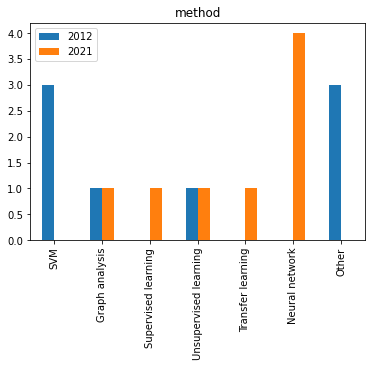

In [92]:
create_viz(df, word_list, 8, 'bar', 'method')

,2012,2021
AUC,1,3
Specificity,1,0
Accuracy,5,4
Recall,0,0
F1 score,0,0
Sensitivity,1,0
Other,3,3


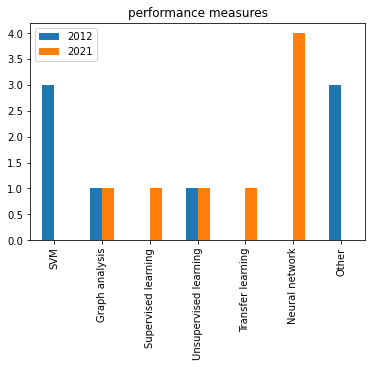

In [91]:
create_viz(df, perf_list, 9,'bar', 'performance measures')